In [22]:
import torch
from d2l import torch as d2l

In [23]:
def softmax(X) :
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp/partition

In [24]:
X = torch.rand((2,5))
X_prob = softmax(X)
X_prob , X_prob.sum(1)

(tensor([[0.1633, 0.1941, 0.3000, 0.1718, 0.1708],
         [0.2558, 0.1425, 0.2067, 0.1676, 0.2274]]),
 tensor([1.0000, 1.0000]))

In [25]:
"""Defining the Model"""
class softMaxRegressionScratch(d2l.Classifier) :
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01) :
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs), requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)
    def parameters(self) :
        return [self.W, self.b]

In [26]:
@d2l.add_to_class(softMaxRegressionScratch)
def forward(self, X) :
    X = X.reshape(-1, self.W.shape[0])
    return softmax(torch.matmul(X, self.W) + self.b)


In [ ]:
# y = torch.tensor([0,2])
# y_hat = torch.tensor([0.1, 0.3, 0.6],[0.3, 0.2, 0.5])
# y_hat[[0,1], y] #this means y_hat[row0col0, row1col2] 

In [27]:
"""The cross entropy Loss"""

def cross_entropy(y_hat, y) :
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

In [28]:
@d2l.add_to_class(softMaxRegressionScratch)
def loss(self, y_hat, y) :
    return cross_entropy(y_hat, y)

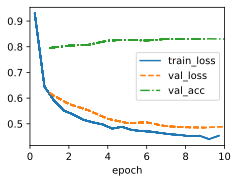

In [29]:
"""Training"""
data = d2l.FashionMNIST(batch_size=256)
model = softMaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [31]:
"""Prediction"""

X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

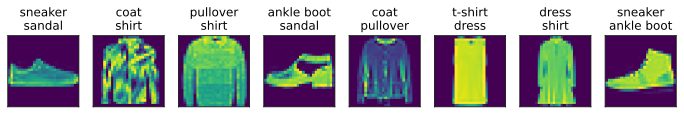

In [34]:
"""Wrong predictions"""
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels=[a + '\n' + b for a,b in zip(data.text_labels(y), data.text_labels(preds))]
data.visualize([X,y], labels=labels)
